# 라이브러리

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#개봉월 전처리
def get_month(x):
        return x[5:7]

#배급사 전처리
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스엔터'
    elif '마운틴' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    elif 'NEW' in x :
        return 'NEW'
    elif '롯데' in x :
        return '롯데엔터'
    elif '프리비젼' in x :
        return '프리비젼엔터'
    elif '타임스' in x :
        return '타임스토리'
    elif '마달'in x or '마 달' in x:
        return '시네마달'
    else :
        return x

# 불러오기

In [2]:
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

# 1. 배급사 전처리

In [3]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

C:\Users\user\AppData\Local\Temp/ipykernel_6836/768766398.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['distributor'] = train.distributor.str.replace("(주)", '')
C:\Users\user\AppData\Local\Temp/ipykernel_6836/768766398.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['distributor'] = test.distributor.str.replace("(주)", '')


### 배급사 중위값으로 랭크 생성

In [4]:
dis_medi_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'dis_medi_rank').sort_values(by = 'dis_medi_rank')
dis_medi_rank['dis_medi_rank'] = [i + 1 for i in range(dis_medi_rank.shape[0])]
dis_medi_rank

,distributor,dis_medi_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
113,전망좋은영화사,143
105,이십세기폭스코리아,144
56,쇼박스,145
84,영구아트무비,146


### 배급사 평균값으로 랭크 생성

In [5]:
dis_mean_rank = train.groupby('distributor').box_off_num.mean().reset_index(name = 'dis_mean_rank').sort_values(by = 'dis_mean_rank')
dis_mean_rank['dis_mean_rank'] = [i + 1 for i in range(dis_mean_rank.shape[0])]
dis_mean_rank

,distributor,dis_mean_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
7,NEW,143
1,CJ,144
84,영구아트무비,145
75,아이필름코퍼레이션,146


### 배급사 관객수 합 변수 생성

In [6]:
dis_sum = train.groupby('distributor').box_off_num.sum().reset_index(name = 'dis_sum')
dis_sum

,distributor,dis_sum
0,BoXoo엔터테인먼트,93432
1,CJ,140522374
2,JK필름,688639
3,KBS미디어,7956
4,KT,807835
...,...,...
142,하준사,600
143,한국YWCA연합회,71
144,홀리가든,6886
145,화앤담이엔티,344393


### 배급사 MERGE

In [7]:
#중위값 merge
train = pd.merge(train, dis_medi_rank, how = 'left')
test = pd.merge(test, dis_medi_rank, how = 'left')
#평균값 merge
train = pd.merge(train, dis_mean_rank, how = 'left')
test = pd.merge(test, dis_mean_rank, how = 'left')
#합 merge
train = pd.merge(train, dis_sum, how = 'left')
test = pd.merge(test, dis_sum, how = 'left')

# 2. 장르 전처리

### 장르 평균값 순위 확인

In [8]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

### 장르 중위값 순위 확인

In [9]:
train.groupby('genre').box_off_num.median().sort_values()

genre
다큐멘터리        3044.0
미스터리         3199.0
멜로/로맨스       3653.0
뮤지컬          4778.0
드라마          7173.0
SF           9323.0
애니메이션       23802.0
서스펜스        82611.0
공포         179810.0
코미디        210775.0
액션        1147846.5
느와르       1646142.0
Name: box_off_num, dtype: float64

### 장르 평균값 순위 맵핑

In [10]:
train['gr_mean_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['gr_mean_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

### 장르 중위값 순위 맵핑

In [11]:
train['gr_medi_rank'] = train.genre.map({'다큐멘터리' : 1, '미스터리' : 2, '멜로/로맨스' : 3, '뮤지컬' : 4, '드라마' : 5,
                                      'SF' : 6, '애니메이션' : 7, '서스펜스' : 8, '공포' : 9, '코미디' : 10, '액션' : 11, '느와르' : 12})
test['gr_medi_rank'] = test.genre.map({'뮤지컬' : 1, '미스터리' : 2, '멜로/로맨스' : 3, '뮤지컬' : 4, '드라마' : 5,
                                      'SF' : 6, '애니메이션' : 7, '서스펜스' : 8, '공포' : 9, '코미디' : 10, '액션' : 11, '느와르' : 12})

# 3. 개봉월 전처리

In [12]:
month = train.release_time.apply(get_month)
train['month'] = month
month = test.release_time.apply(get_month)
test['month'] = month

### 개봉월 중위값 순위 확인

In [13]:
train.groupby('month').box_off_num.median().sort_values()

month
03      4110.5
05      7448.0
04      7956.0
07      9301.0
12      9323.0
02     10203.0
09     14931.0
11     15813.0
08     16248.0
06     18343.0
10     45112.0
01    283449.0
Name: box_off_num, dtype: float64

### 개봉월 평균값 순위 확인

In [14]:
train.groupby('month').box_off_num.mean().sort_values()

month
04    2.581667e+05
03    2.738874e+05
10    3.859042e+05
11    4.956539e+05
06    5.122865e+05
05    5.756852e+05
02    6.630252e+05
09    7.315286e+05
08    1.029162e+06
07    1.113807e+06
12    1.288248e+06
01    1.365931e+06
Name: box_off_num, dtype: float64

### 개봉월 관객수 합 변수 생성

In [15]:
month_sum = train.groupby('month').box_off_num.sum().reset_index(name = 'month_sum')
month_sum

,month,month_sum
0,01,53271292
1,02,20553781
2,03,14242143
3,04,12133835
4,05,32814059
5,06,14856308
6,07,54576555
7,08,56603892
8,09,43891718
9,10,23154249


### 개봉월 MERGE

In [16]:
#합 merge
train = pd.merge(train, month_sum, how = 'left')
test = pd.merge(test, month_sum, how = 'left')

### 개봉월 평균값 순위 맵핑

In [17]:
train['month_mean_rank'] = train.month.map({'04' : 1, '03' : 2, '10' : 3, '11' : 4, '06' : 5,
                                      '05' : 6, '02' : 7, '09' : 8, '08' : 9, '07' : 10, '12' : 11, '01' : 12})
test['month_mean_rank'] = test.month.map({'04' : 1, '03' : 2, '10' : 3, '11' : 4, '06' : 5,
                                      '05' : 6, '02' : 7, '09' : 8, '08' : 9, '07' : 10, '12' : 11, '01' : 12})

### 개봉월 중위값 순위 맵핑

In [18]:
train['month_medi_rank'] = train.month.map({'03' : 1, '04' : 2, '12' : 3, '07' : 4, '05' : 5,
                                      '02' : 6, '11' : 7, '09' : 8, '08' : 9, '06' : 10, '10' : 11, '01' : 12})
test['month_medi_rank'] = test.month.map({'03' : 1, '04' : 2, '12' : 3, '07' : 4, '05' : 5,
                                      '02' : 6, '11' : 7, '09' : 8, '08' : 9, '06' : 10, '10' : 11, '01' : 12})

# 4. 상영시간 그대로 사용
# 5. 영상등급은 모델 설정시 원핫인코딩
# 6. 스태프수 그대로 사용

# 7. 데이터 스케일링

### 배급사, 장르, 월, 스태프 수, 상영시간 스케일링

In [19]:
dis_medi_norm = train.groupby('distributor').box_off_num.median().reset_index(name = 'dis_medi_norm').sort_values(by = 'dis_medi_norm')
dis_mean_norm = train.groupby('distributor').box_off_num.mean().reset_index(name = 'dis_mean_norm').sort_values(by = 'dis_mean_norm')
gr_medi_norm = train.groupby('genre').box_off_num.median().reset_index(name = 'gr_medi_norm').sort_values(by = 'gr_medi_norm')
gr_mean_norm = train.groupby('genre').box_off_num.mean().reset_index(name = 'gr_mean_norm').sort_values(by = 'gr_mean_norm')
month_medi_norm = train.groupby('month').box_off_num.median().reset_index(name = 'month_medi_norm').sort_values(by = 'month_medi_norm')
month_mean_norm = train.groupby('month').box_off_num.mean().reset_index(name = 'month_mean_norm').sort_values(by = 'month_mean_norm')

In [20]:
train = pd.merge(train, dis_medi_norm, how = 'left')
train = pd.merge(train, dis_mean_norm, how = 'left')
train = pd.merge(train, gr_medi_norm, how = 'left')
train = pd.merge(train, gr_mean_norm, how = 'left')
train = pd.merge(train, month_medi_norm, how = 'left')
train = pd.merge(train, month_mean_norm, how = 'left')

test = pd.merge(test, dis_medi_norm, how = 'left')
test = pd.merge(test, dis_mean_norm, how = 'left')
test = pd.merge(test, gr_medi_norm, how = 'left')
test = pd.merge(test, gr_mean_norm, how = 'left')
test = pd.merge(test, month_medi_norm, how = 'left')
test = pd.merge(test, month_mean_norm, how = 'left')

In [21]:
from sklearn.preprocessing import minmax_scale, StandardScaler, MinMaxScaler

train['dis_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_mean_norm']]).transform(train[['dis_mean_norm']])
train['dis_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_medi_norm']]).transform(train[['dis_medi_norm']])
train['gr_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['gr_mean_norm']]).transform(train[['gr_mean_norm']])
train['gr_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['gr_medi_norm']]).transform(train[['gr_medi_norm']])
train['month_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_mean_norm']]).transform(train[['month_mean_norm']])
train['month_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_medi_norm']]).transform(train[['month_medi_norm']])
train['num_staff_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['num_staff']]).transform(train[['num_staff']])
train['time_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['time']]).transform(train[['time']])
train['dis_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_sum']]).transform(train[['dis_sum']])
train['dir_prev_bfnum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dir_prev_bfnum']]).transform(train[['dir_prev_bfnum']])
train['month_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_sum']]).transform(train[['month_sum']])

In [22]:
test['dis_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_mean_norm']]).transform(test[['dis_mean_norm']])
test['dis_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_medi_norm']]).transform(test[['dis_medi_norm']])
test['gr_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['gr_mean_norm']]).transform(test[['gr_mean_norm']])
test['gr_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['gr_medi_norm']]).transform(test[['gr_medi_norm']])
test['month_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_mean_norm']]).transform(test[['month_mean_norm']])
test['month_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_medi_norm']]).transform(test[['month_medi_norm']])
test['num_staff_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['num_staff']]).transform(test[['num_staff']])
test['time_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['time']]).transform(test[['time']])
test['dis_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_sum']]).transform(test[['dis_sum']])
test['dir_prev_bfnum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dir_prev_bfnum']]).transform(test[['dir_prev_bfnum']])
test['month_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_sum']]).transform(test[['month_sum']])

# 데이터 확인

In [23]:
test = test.fillna(0)
train = train.fillna(0)

In [24]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dis_medi_rank,dis_mean_rank,dis_sum,gr_mean_rank,...,dis_mean_norm,gr_medi_norm,gr_mean_norm,month_medi_norm,month_mean_norm,num_staff_norm,time_norm,dis_sum_norm,dir_prev_bfnum_norm,month_sum_norm
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,6.000000e+02,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05,93.520000,102.576667,3.098719e+07,6.790000,...,0.212478,0.097884,0.310826,0.101406,0.406237,0.173899,0.413802,0.220514,0.026835,0.474578
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06,43.390138,39.472618,4.891525e+07,2.801603,...,0.293144,0.245787,0.263436,0.240284,0.325977,0.190627,0.134056,0.348096,0.074337,0.334105
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,2.000000e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03,53.750000,76.000000,3.529300e+04,5.000000,...,0.001563,0.000371,0.185790,0.013766,0.115311,0.019563,0.325926,0.000251,0.000000,0.165128
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04,99.000000,107.000000,3.037420e+05,8.000000,...,0.008638,0.002513,0.274277,0.038736,0.286630,0.094937,0.407407,0.002162,0.000000,0.461916
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05,134.250000,141.000000,6.438374e+07,8.000000,...,0.371487,0.063214,0.274277,0.043451,0.695992,0.303797,0.511111,0.458174,0.021353,0.832368
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07,147.000000,147.000000,1.405224e+08,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 학습데이터 설정

변수 정리 (12개 계획)

배급사
1. 중위값 랭크 'dis_medi_rank'
2. 평균값 랭크 'dis_mean_rank'
3. 중위값 스케일링 'dis_medi_norm'
4. 평균값 스케일링 'dis_mean_norm'

장르
5. 중위값 랭크 'gr_medi_rank'
6. 평균값 랭크 'gr_mean_rank'
7. 중위값 스케일링 'gr_medi_norm'
8. 평균값 스케일링 'gr_mean_norm'


개봉월
9. 중위값 랭크 'month_medi_rank'
10. 평균값 랭크 'month_mean_rank'
11. 중위값 스케일링 'month_medi_norm'
12. 평균값 스케일링 'month_mean_norm'


상영시간
13. 전처리 없이 'time'
14. 스케일링 'time_norm'

스태프 수
15. 전처리 없이 'num_staff'
16. 스케일링 'num_staff_norm'

상영등급
17. 원핫인코딩 'screening_rat'
- 학습데이터 = pd.get_dummies(columns = ['screening_rat'], data = 학습데이터)

=============================


감독 이전 관객수
18. 기본값 'dir_prev_bfnum'

감독 이전 영화수
19. 기본값 'dir_prev_num'

In [25]:
#####학습 변수#####
X = train[['dis_sum','dis_sum_norm','gr_mean_norm','gr_mean_rank','month_mean_norm','dir_prev_num','dir_prev_bfnum','time','num_staff']]

#####예측 값#####
y = train['box_off_num']
#로그를 씌우고 싶다면
y = np.log1p(train.box_off_num)


target = test[['dis_sum','dis_sum_norm','gr_mean_norm','gr_mean_rank','month_mean_norm','dir_prev_num','dir_prev_bfnum','time','num_staff']]

# 모델 설정

In [26]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from math import sqrt
from sklearn.linear_model import LinearRegression

In [27]:
kf = KFold(n_splits =  5, shuffle = True, random_state = 42)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [29]:
hyper_parameter = {
    'alpha' : [0.01, 0.1, 1, 10],
    'max_iter' : [100, 500, 1000, 1500, 2000]
}

In [30]:
lasso_model = Lasso(alpha=0.001, max_iter=1000, normalize=True)

In [31]:
hyper_parameter_tuner = GridSearchCV(lasso_model, hyper_parameter, cv=kf)
hyper_parameter_tuner.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(alpha=0.001, normalize=True),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

In [32]:
hyper_parameter_tuner.best_params_

{'alpha': 0.01, 'max_iter': 100}

In [53]:
xgb = XGBRegressor(random_state = 42, alpha=0.01, max_iter=100)
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
ada = AdaBoostRegressor(n_estimators=100)
lin = LinearRegression()

In [34]:
xgb.fit(X_train, y_train)

[00:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_iter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, max_iter=100, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [35]:
importances = xgb.feature_importances_ #속성중요도
importances

array([0.56040597, 0.        , 0.05062939, 0.        , 0.06835642,
       0.02993772, 0.06233554, 0.07204147, 0.15629345], dtype=float32)

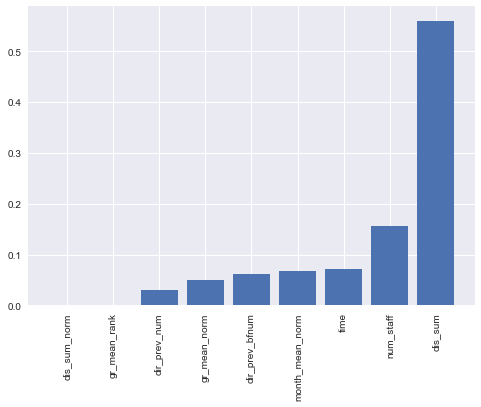

In [36]:
indices_sorted = np.argsort(importances) #속성중요도 시각화
plt.style.use("seaborn")
plt.figure()
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [37]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [39]:
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [40]:
lin.fit(X_train, y_train)

LinearRegression()

In [41]:
xg_pred = xgb.predict(X_test)
gbr_pred = gbr.predict(X_test)
rf_pred = rf.predict(X_test)
ada_pred = ada.predict(X_test)
lin_pred = lin.predict(X_test)

In [42]:
mean_squared_error(y_test, xg_pred) ** 0.5

1.5708469730091057

In [43]:
mean_squared_error(y_test, gbr_pred) ** 0.5

1.4241646313271805

In [44]:
mean_squared_error(y_test, rf_pred) ** 0.5

1.3879613849322596

In [45]:
mean_squared_error(y_test, ada_pred) ** 0.5

1.6654964166590185

In [46]:
mean_squared_error(y_test, lin_pred) ** 0.5

1.8058874001566725

# Score

In [47]:
xgb.score(X_test, y_test) #예측확률 70%

0.7985845358111746

In [48]:
gbr.score(X_test, y_test) #예측확률 80%

0.8344438018757437

In [49]:
rf.score(X_test, y_test) #예측확률 80%

0.8427539228666171

In [50]:
ada.score(X_test, y_test)

0.7735812138067665

In [51]:
lin.score(X_test, y_test)

0.7338010191847597

In [52]:
submission.to_csv('team2_movies_13.csv', index = False)